In [1]:
import pandas as pd
import plotly.express as px

# Location data

In [2]:
def plot_locations(file, metric):
    df = pd.read_csv("../../data/final/" + file)
    df

    # Grab the subset of data for this metric
    subset = df[["latitude", "longitude", metric]]
    subset = subset.dropna()

    # Calculate summary statistics
    minimum = subset[metric].min()
    maximum = subset[metric].max()
    mean = subset[metric].mean()
    std = subset[metric].std()

    # Plot choropleth
    fig = px.scatter_geo(
        subset,
        lat="latitude",
        lon="longitude",
        color=metric,
        size=metric,
        scope="usa",
        range_color=(max(mean - 2 * std, minimum), min(mean + 2 * std, maximum)),
        color_continuous_scale="Viridis",
        size_max=40,
    )

    fig.update_layout(title_text=metric, title_x=0.5)
    fig.layout.coloraxis.colorbar.title = ""
    fig.update_layout(
        margin=dict(l=0, r=0, t=40, b=0),
    )

    fig.show("png")

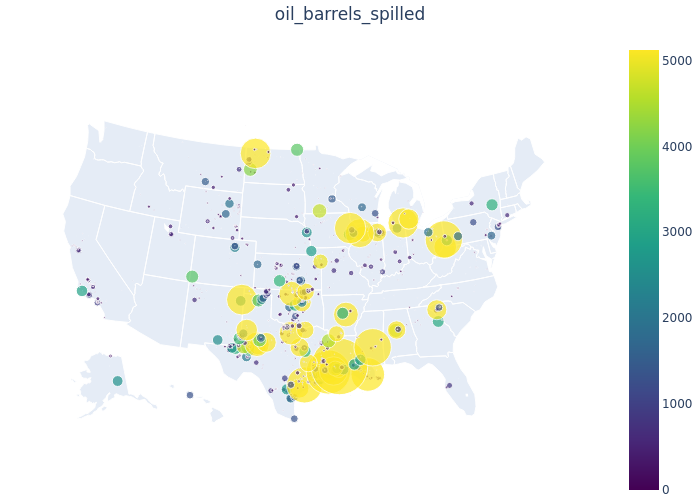

In [3]:
plot_locations("oil_accidents.csv", "oil_barrels_spilled")